In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
x=data.iloc[:,[3,4]].values

In [ ]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
x.shape

(200, 2)

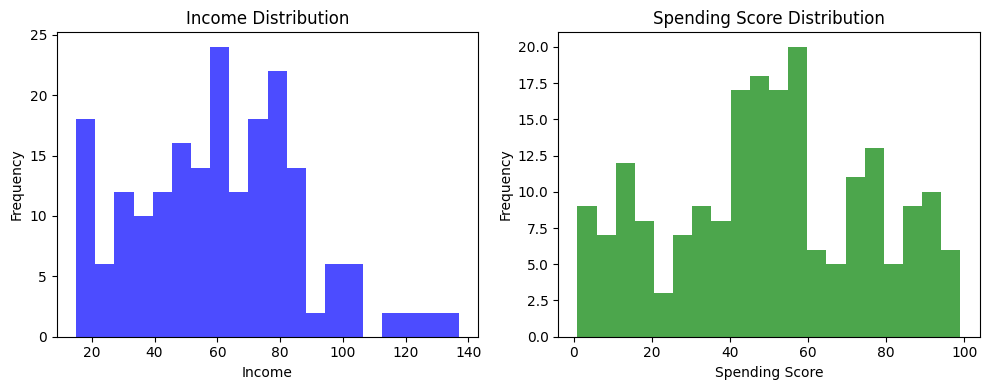

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(x[:, 0], bins=20, color='blue', alpha=0.7)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(x[:, 1], bins=20, color='green', alpha=0.7)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=2, n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

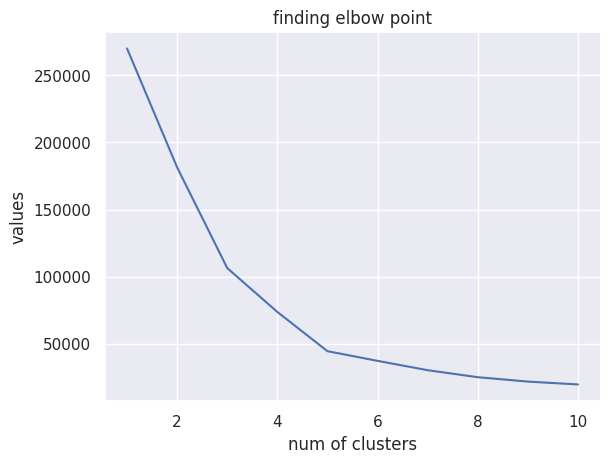

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('finding elbow point')
plt.xlabel('num of clusters')
plt.ylabel('values')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

pred=kmeans.fit_predict(x)
print(pred)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


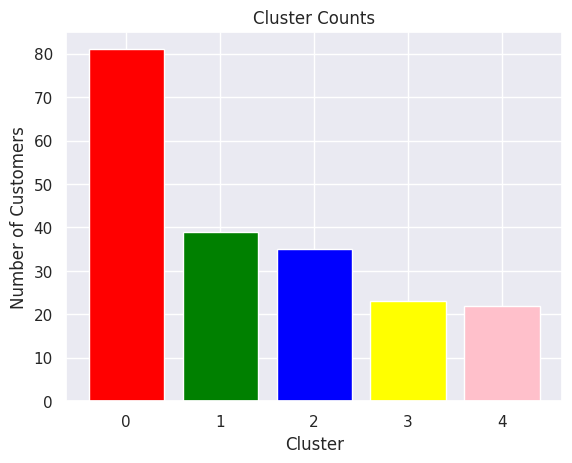

In [ ]:
import numpy as np
unique, counts = np.unique(pred, return_counts=True)
plt.bar(unique, counts, color=['red', 'green', 'blue', 'yellow', 'pink'])
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

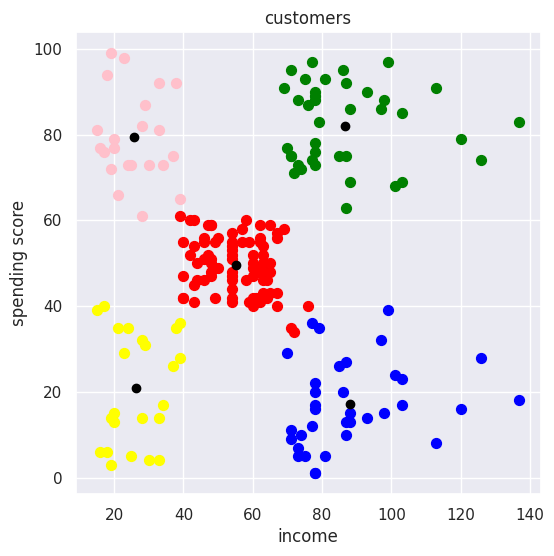

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x[pred==0,0],x[pred==0,1],color='red',s=50, label='cluster 1')
plt.scatter(x[pred==1,0],x[pred==1,1],color='green',s=50, label='cluster 2')
plt.scatter(x[pred==2,0],x[pred==2,1],color='blue',s=50, label='cluster 3')
plt.scatter(x[pred==3,0],x[pred==3,1],color='yellow',s=50, label='cluster 4')
plt.scatter(x[pred==4,0],x[pred==4,1],color='pink',s=50, label='cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',label='centroid')
plt.title('customers')
plt.xlabel('income')
plt.ylabel('spending score')
plt.show()

In [ ]:
import numpy as np
new_data = np.array([[50, 60], [80, 90]])
new_predictions = kmeans.predict(new_data)
print("Cluster predictions for new data points:", new_predictions)


Cluster predictions for new data points: [0 1]
